# Hands-on 03: Visualização de sinais na frequência (gerando e vendo o espectro de um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre amostragem e a consequência de seu valor na resconstrução de um sinal amostrado
- Visualização do conteúdo em frequência (_single_ e _double sided_) de um sinal
- Visualizar conteúdo espectral de sinais de áudio.

# Prática 1: Influência da taxa de amostragem na geração de um sinal no tempo

**Passo 1:** Abra um script no Spyder, salve-o como **handson3_1.py** e escreva o seguinte código:

#### Observação:
Antes de executar, remova a última linha:
```ipython
%whos
```
Esta não é uma função do Python, e sim um comando específico do IPython. Desse modo, só funciona nos notebooks ou no Console IPython embutido no Spyder. Comandos desse tipo são conhecidos como _magic function_, e acrescentam funcionalidades interessantes aos códigos Python. Para saber mais sobre as _magics_, acesse  a [documentação](https://ipython.org/ipython-doc/3/interactive/tutorial.html). 

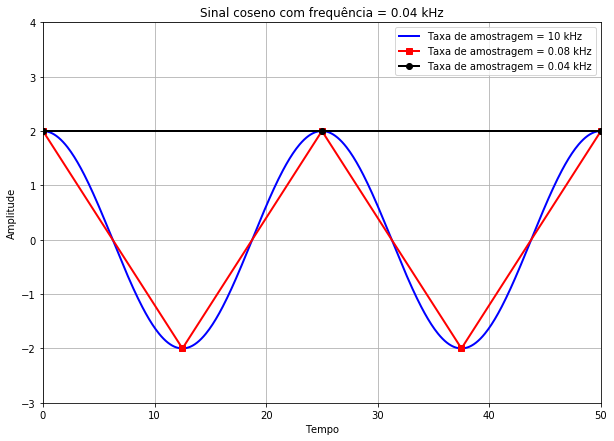

Variable    Type          Data/Info
-----------------------------------
Am          int           2
L           int           2000
N           int           2000
T           float         0.1
WN          complex128    (0.999995065202-0.00314158748588j)
WNnk        ndarray       2000x2000: 4000000 elems, type `complex128`, 64000000 bytes (61.03515625 Mb)
X           ndarray       2000: 2000 elems, type `complex128`, 32000 bytes
f           ndarray       1001: 1001 elems, type `float64`, 8008 bytes
fm          float         0.04
freq1       ndarray       256: 256 elems, type `float64`, 2048 bytes
fsampling   float         0.04
k           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
lfft        int           512
m           ndarray       2001: 2001 elems, type `float64`, 16008 bytes
m2          ndarray       17: 17 elems, type `float64`, 136 bytes
m3          ndarray       9: 9 elems, type `float64`, 72 bytes
n           ndarray       2000: 2000 elems, type `int64`, 16000 by

In [8]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt


## Geração do sinal cosenoidal
fsampling = 10                                     # Taxa de amostragem  (kHz)
tf = 200                                           # Tempo final 
t = np.arange(0,tf+1/fsampling,1/fsampling)        # Vetor tempo discreto, obedecendo o tempo de amostragem
fm = 0.04                                          # Frequência do sinal senoidal
Am = 2                                             # Amplitude do sinal senoidal
m = Am*np.cos(2*np.pi*fm*t)                        # Geração de amostras do sinal senoidal

plt.figure(figsize=(10,7))                         # Configura o tamanho da figura

plt.plot(t,m,'b',linewidth=2)                      # Plota gráfico do coseno com taxa de amostragem fsampling
plt.xlabel('Tempo')                                # Definição do texto do eixo X
plt.ylabel('Amplitude')                            # Definição do texto do eixo Y 
plt.grid()                                         # Desenhar o grid do gráfico                           

## Gráfico do coseno com nova taxa de amostragem = 0.08 (o dobro da banda do sinal)
fsampling = 0.08                                   # Taxa de amostragem (kHz)
t2 = np.arange(0,tf+1/fsampling,1/fsampling)       # Geração de amostras do sinal m(t) com nova taxa de amostragem
m2 = Am*np.cos(2*np.pi*fm*t2)                      # Geração de amostras do sinal m(t) com nova taxa de amostragem    
plt.plot(t2,m2,'r-s',linewidth=2)                  # Plota com nova taxa de amostragem (linha com marcador quadrado) 

## Gráfico do coseno com nova taxa de amostragem = 0.04 (igual a banda do sinal)
fsampling = 0.04                                   # Taxa de amostragem (kHz)
t3 = np.arange(0,tf+1/fsampling,1/fsampling)       # Geração de amostras do sinal m(t) com nova taxa de amostragem
m3 = Am*np.cos(2*np.pi*fm*t3)                      # Geração de amostras do sinal m(t) com nova taxa de amostragem
plt.plot(t3,m3,'k-o',linewidth=2)                  # Plota com nova taxa de amostragem (linha com marcador circular) 
plt.legend(['Taxa de amostragem = 10 kHz',         # Adiciona legenda ao gráfico
'Taxa de amostragem = 0.08 kHz',
'Taxa de amostragem = 0.04 kHz'])                  
plt.title('Sinal coseno com frequência = 0.04 kHz')# Adiciona título ao gráfico

plt.axis([0,2*1/fm,-3,4])                          # Zoom em dois períodos da onda

plt.show()
# A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
# identificando suas principais caracteristicas.
%whos

#### Observação
No começo do código, configuramos o tamanho da figura com a linha de código abaixo
```python
plt.figure(figsize=(10,7))                         # Configura o tamanho da figura
```
Esse comando cria uma instância da classe 'figure', que abriga o plot de uma ou mais linhas, suas legendas, cores, etc. Vale salientar que ela deve ser inserida no início de uma plotagem que se deseja fazer, para evitar problemas com múltiplas instâncias. Entenda que essa configuração de tamanho é opcional, com a finalidade de melhorar a visualização. 

**Passo 2** Escreva um script trocando cosseno por seno e verifique o que acontece com as curvas.

**Passo 3** Insira a linha de código explanada acima logo após o comando abaixo,
```python
plt.title('Sinal coseno com frequência = 0.04 kHz')# Adiciona título ao gráfico
```
execute o script e veja o resultado. Isso ocorre porque a instância de 'figure' foi feita depois de se configurar o plot (adicionar as linhas), portanto, existem duas figuras em questão. Uma detalhada anteriormente e uma vazia, com apenas duas características limitação dos eixos (vide o comando plt.axis()) e tamanho 10x7 polegadas, e a função plt.show() irá exibir as duas. Esse teste pode ser realizado no próprio notebook, mas lembre-se de retornar a linha plt.figure()... para seu devido lugar.

**Passo 4** Execute o comando %whos no console IPython embutido no Spyder. 

# Prática 2: Amplitude do espectro _single sided band_ 

Vamos praticar a construção da magnitude do espectro de um sinal cossenoidal, um tom, sem usar as funções prontas do Python. Usaremos a função **plt.stem($\cdot$)** ao invés da função **plt.plot($\cdot$)**, isso facilitará a visualização no eixo da frequência.

**Passo 1:** Abra o Spyder e digite no _Console IPython_ os seguinte comandos:

> ```python
import numpy.fft as fft  #importa o pacote 'fft' da biblioteca 'numpy'
edit fft                  
edit fft.fft
```

Isso abrirá os arquivos (na ordem):
- $__init__$.py : Arquivos com esse título servem para marcar um diretório no disco como um diretório de pacote do Python. Lembre que o interpretador irá procurar nos diretórios do disco pelo pacote que está sendo chamado, e diretórios com nomes especiais (numpy,matplotlib,etc...) poderiam ser confundidos com os diretórios próprios dessas bibliotecas. Para evitar esse problema, diretórios de pacote contém o script marcador $__init__$.py, que pode estar vazio, inclusive. 

- fftpack.py : Script contendo a definição das funções em comentários, bem como os seus respectivos códigos-fonte. O entendimento das definições pode ser um pouco sutil, dado que essas não são sempre intuitivas. 

Em Python, não existe 'código escondido'. Diz-se que uma função é _Built-in_ quando esta pode ser chamada sem importar uma biblioteca específica.

**Passo 2:** Antes de usar a função do Python, vamos implementar um algoritmo para a DFT utilizando sua definição. Abra um script no Spyder, salve-o como **handson3_2.py** e escreva o seguinte código (remova a linha %whos):

Tempo da DFT =  1.6963600000000003 s


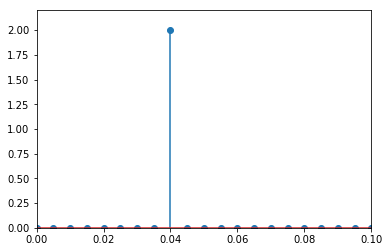

Variable    Type          Data/Info
-----------------------------------
Am          int           2
L           int           2000
N           int           2000
T           float         0.1
WN          complex128    (0.999995065202-0.00314158748588j)
WNnk        ndarray       2000x2000: 4000000 elems, type `complex128`, 64000000 bytes (61.03515625 Mb)
X           ndarray       2000: 2000 elems, type `complex128`, 32000 bytes
f           ndarray       1001: 1001 elems, type `float64`, 8008 bytes
fm          float         0.04
freq1       ndarray       256: 256 elems, type `float64`, 2048 bytes
fsampling   int           10
k           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
lfft        int           512
m           ndarray       2000: 2000 elems, type `float64`, 16000 bytes
n           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
nn          ndarray       2000x2000: 4000000 elems, type `int64`, 32000000 bytes (30.517578125 Mb)
np          module        <m

In [7]:
import warnings                                      # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')                    # Método para suprimir os avisos de exceções

import numpy as np
import matplotlib.pyplot as plt
import time
## Geração do sinal cosenoidal
fsampling = 10                                       # Taxa de amostragem
T =1/fsampling                                       # Tempo entre amostras
L = 2000                                             # Número de amostras
t = np.arange(0,(L-1)*T+1/fsampling,1/fsampling)     # Eixo do tempo
fm = 0.04                                            # Frequência da senoide
Am = 2                                               # Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                          # Sinal senoidal
t1=time.clock()                                      # Contador de tempo

## Montando a DFT
N=len(m)                                             # Comprimento do sinal m(t)
n=np.arange(0,N)                                     # Vetor n
k=np.arange(0,N)                                     # Vetor k
WN=np.exp(-1j*2*np.pi/N)                             # Cálculo de Wn = e^{-j2pi/N}
nn=np.outer(n,k)                                     # Monta a Matriz DFT
WNnk=WN**nn                                          # Monta a Matriz DFT
X=np.inner(m,WNnk.T/L)                               # Implementa o somatório da DFT via operação matricial    
f = fsampling/2*np.linspace(0,1,(L/2)+1)             # Monta o eixo das frequências
tempo_DFT=time.clock() - t1                          # Conta tempo de execução até esse ponto do código
print('Tempo da DFT = ',tempo_DFT,'s')               # Mostra tempo de execução
plt.stem(f,2*np.abs(X[0:L/2+1]))                     # Mostra gráfico do espectro 
plt.axis([0,0.1,0,2.2])                              # Zoom para melhor visualização 
plt.show()
# A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
# identificando suas principais caracteristicas.
%whos



### Sobre o código:

#### Ignorando avisos
Em Python, surge um conceito novo de programação, conhecido como 'exceção'. É semelhante a um 'erro', mas não compromete a execução do programa. Para saber mais sobre o levantamento de exeções e como elas funcionam, veja a [documentação](http://turing.com.br/pydoc/2.7/tutorial/errors.html). Não há necessidade, no escopo da matéria, de deixar esses avisos serem exibidos nos notebooks, por isso usamos as linhas abaixo para ignorá-los:
```python
import warnings        # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore') 
```
#### Potências

Elevar uma base 'a' a um expoente 'b' é bem simples, em Python: basta usar o operador $**$ . Não é necessário utilizar as bibliotecas _math_ ou _numpy_. Na linha abaixo,
```python
WNnk=WN**nn                             # Monta a Matriz DFT
```
o escalar 'WN' foi elevado a uma matriz de expoentes 'nn', e o resultado dessa operação foi outra matriz, com as mesmas dimensões de nn, cujos elementos correspondiam ao resultado de WN elevado ao elemento de mesma posição em nn.

#### Biblioteca time

Permite uma série de funcionalidades relacionadas a medição de tempo, como contadores e até tempos de espera na execução. Veja mais na [documentação](https://docs.python.org/2/library/time.html). 

```python
import time
t1=time.clock()                                      # Contador de tempo
```
Esse comando faz uma medição de tempo, acessando um valor de tempo definido pelo contador do sistema. Veja que ele é usado mais uma vez no fim do código para colher outra amostra de tempo e subtrair t1, para conseguir um valor de intervalo de tempo:
```python
tempo_DFT=time.clock() - t1     # Conta tempo de execução até esse ponto do código
```

**Passo 3:** Entenda o funcionamento das funções np.outer(), np.inner() e np.linspace() através do Spyder. Para isso:
- Observe as variáveis geradas por essas funções no _variable explorer_, no canto superior direito da tela.
- Use o console do IPython para acessar a definição da função (ver Passo 4 da Prática 1, Hands-on 02 Python).
- Explore o código fonte (ver Passo 1 da prática atual).

# Prática 3: Amplitude do espectro usando as funções do Python

Agora vamos usar as funções prontas do Python (biblioteca NumPy) para gerar o espectro de um sinal. Seguiremos os seguintes passos:
- Definir o tamanho da FFT (resolução em frequência)
- Definir a frequência de amostragem (seguindo a montagem do sinal no tempo)
- Normalizar a amplitude
- Definir o eixo da frequência de acordo com o comprimento da FFT e a taxa de amostragem.

A resolução mínima de frequência irá determinar o número de pontos da FFT. 


**Passo 1:** Abra um script no Spyder, salve-o como **handson3_3.py** e escreva o seguinte código:

Tempo da FFT =  0.48734199999999994


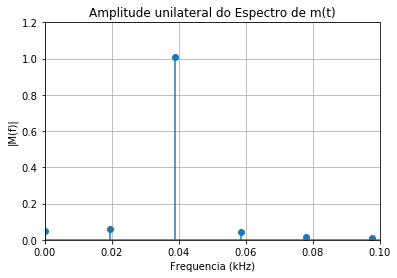

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
#Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal
t1=time.clock()                                              #Contador de tempo

#Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 512                                                   #Tamanho da FFT  
#Construção do single-sided amplitude spectrum.
yfft = np.fft.fft(m,lfft)/lfft                               #Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              #Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    #Coleta da FFT unilateral
plt.stem(freq1,abs(yfftuni))                                 #Plotagem do espectro unilateral M(f)
tempo_FFT=time.clock() - t1                                  #Conta tempo de execução até esse ponto do código
print('Tempo da FFT = ',tempo_FFT)                           #Mostra de tempo de execução
plt.title('Amplitude unilateral do Espectro de m(t)')        #Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               #Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         #Configuração do eixo y do gráfico  
plt.grid()                                                   #Adiona o grid  
plt.axis([0,0.1,0,1.2])                                      #Zoom do gráfico
plt.show()

Pelo gráfico, vemos que o pico não está centrado em 0,04 kHz. Podemos ver que quando a curva se aproxima de 0,04 kHz a amplitude cresce e em seguida decresce. Isso é muito comum de acontecer, e deve ao fato de que o eixo da frequência não está definido o valor de 0.04. Vamos inspecionar a variável _freq1_, os pontos mais pŕoximos de 0,04 são 0.0391 kHz e 0.0586 kHz, por isso o gráfico está aparentemente deslocado. Caso estivesse definido em 0.04, haveria o pico máximo. 

**Passo 2:** Vamos inspecionar as variável _freq1_, digite _freq1_ no Console IPython do Spyder:

In [6]:
# Seis primeiros termos do vetor freq1 mostram que ele não está definido em 0.04 kHz.
freq1[0:5]

array([ 0.        ,  0.01953125,  0.0390625 ,  0.05859375,  0.078125  ])

O motivo de usar a função **plt.stem($\cdot$)** no lugar de **plt.plot($\cdot$)** é que esta última faz a ligação dos pontos subsequentes e os aproxima como retas, o que pode mascarar o real comportamento do escpectro. 


**Passo 3:** Vamos verificar a influência do tamanho da FFT no espectro mostrado. Abra um script no Spyder, salve-o como **handson3_4.py** e escreva o seguinte código. O código ilustra os dois casos: (i) Quando o tamamho da FFT gera um eixo que inclui a frequência da senoide e (ii) Quando o tamanho da FFT **não** gera um eixo que inclui a frequência da senoide.

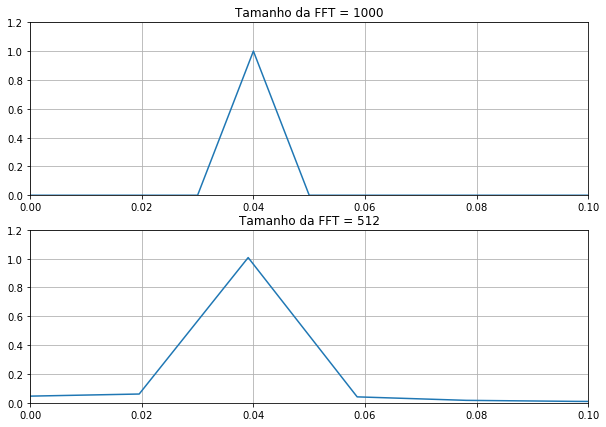

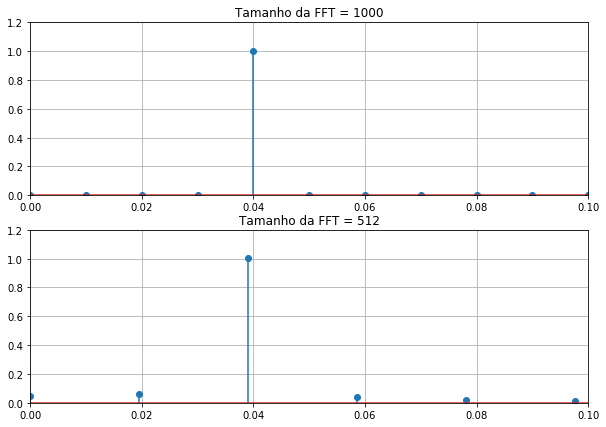

In [3]:
import numpy as np
import matplotlib.pyplot as plt
## Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal

## Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
plt.figure(1,[10,7])                                         #instância de figure, de número 1 e tamanho 10x7

lfft = 1000                                                  # Tamanho da FFT
yfft = np.fft.fft(m,lfft)/lfft                               # Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              # Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    # Coleta da FFT unilateral


## Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
lfft2 = 512                                                  # Tamanho da FFT
yfft2 = np.fft.fft(m,lfft2)/lfft2                            # Cálculo da FFT via função do Matlab
freq2 = np.arange(0,fsampling/2,fsampling/lfft2)             # Definição do eixo das frequências unilateral
yfftuni2 = yfft2[0:lfft2//2]                                 # Coleta da FFT unilateral


## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(freq1,np.abs(yfftuni))                              # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft))
plt.axis([0,0.1,0,1.2])

plt.subplot(212)
plt.plot(freq2,np.abs(yfftuni2))                             # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft2))
plt.axis([0,0.1,0,1.2])

plt.show()

#Gráficos com a função pĺt.stem()
plt.figure(2,[10,7])
plt.subplot(211)
plt.stem(freq1,np.abs(yfftuni))                              # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft))
plt.axis([0,0.1,0,1.2])

plt.subplot(212)
plt.stem(freq2,np.abs(yfftuni2))                             # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft2))
plt.axis([0,0.1,0,1.2])

plt.show() 



Note que só coseguimos visualizar o desvio da frequência central quando usamos a função **plt.stem($\cdot$)**.

# Prática 4: _Double-sided amplitude spectrum_

Queremos mostrar agora os dois lados (positivo e negativo) do espectro frequência. Para isso definiremos alguns vetores de forma diferente que as práticas anteriores.

**Passo 1:** Abra um script no Matlab, salve-o como **handson3_5.py** e escreva o seguinte código:

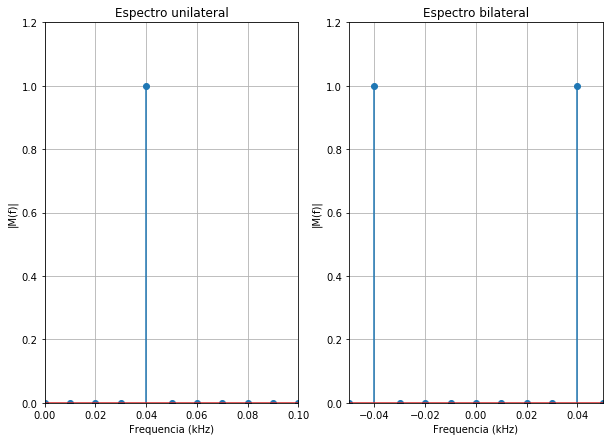

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal

## Plot do sinal M(f): single-sided amplitude spectrum.
# Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 1000
## Construção do single-sided amplitude spectrum.
yfft = np.fft.fft(m,lfft)/lfft                               # Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              # Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    # Coleta da FFT unilateral

plt.figure(1,[10,7])
plt.subplot(121)
plt.stem(freq1,np.abs(yfftuni))                                 # Plotagem do espectro unilateral M(f)
plt.title('Espectro unilateral')                             # Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([0,0.1,0,1.2])                                      # Zoom do gráfico

## Plot do sinal M(f): double-sided amplitude spectrum.
# Colocando as frequência no lado esquerdo 
plt.subplot(122)
## Construção do double-sided amplitude spectrum.
lfftd = 1000
yfftd = np.fft.fft(m,lfftd)/lfftd                            # Cálculo da FFT via função do Matlab
yfftd = np.fft.fftshift(yfft)
# Definição do eixo das frequências unilateral
freqd = np.fft.fftfreq(lfftd,1/fsampling)
freqd = np.fft.fftshift(np.fft.fftfreq(lfftd,1/fsampling))
plt.stem(freqd,np.abs(yfftd))                                # Plotagem do espectro unilateral M(f)
plt.title('Espectro bilateral')                              # Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([-0.05,0.05,0,1.2])                                      # Zoom do gráfico

plt.show()

**Passo 2:** Para entender o que foi feito nas linha de código abaixo:
```python
freqd = np.fft.fftfreq(lfftd,1/fsampling)
freqd = np.fft.fftshift(np.fft.fftfreq(lfftd,1/fsampling))
```
Consulte, com a ajuda do **Console IPython**, a definição dessas duas funções. 

**Passo 3:** Lembre que as células de código (quando o kernel em questão é do próprio Python) do Jupyter Notebook também se comportam como o console IPython, então essa consulta pode ser feita pelo Spyder ou pelo próprio notebook. Sabendo disso, execute as células abaixo:

In [28]:
import numpy as np #apenas se a numpy não tiver sido importada anteriormente
np.fft.fftfreq?

Você pode expandir a definição clicando no canto superior direito da aba que surge, ao lado do 'x'.

In [30]:
np.fft.fftshift?